### Que.Prepare a classification model using Naive Bayes for salary data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Naive Bayes
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Datasets

train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv')

In [3]:
#Copy datasets

df1=train.copy()
df2=test.copy()

In [4]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA & Data Preprocessing


In [4]:
df1.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [5]:
df2.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

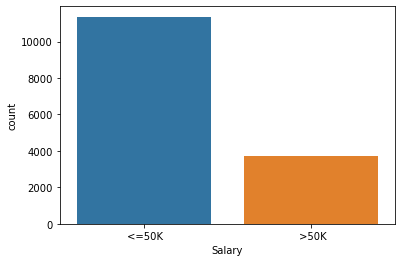

In [13]:
sns.countplot(df2["Salary"])

This shows the data distribution between people having less than or equal to 50k and more than 50k

# Convert Non numeric data into Numeric

In [13]:
t1 = df1.iloc[:,0:13]

t1 = pd.get_dummies(t1)
t1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [14]:
t2 = test.iloc[:,0:13]

t2 = pd.get_dummies(t2)
t2

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
#train data concat
finaltrain = pd.concat([t1, df1['Salary']],axis=1)
finaltrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


.concat() function does all the heavy lifting of performing concatenation operations along with an axis od Pandas objects while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.

In [16]:
#test data concat
finaltest = pd.concat([t2, df2['Salary']],axis=1)
finaltest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [17]:
# Divide Finaltrain & Fianltest Data data
X = finaltrain.values[:,0:102]
Y = finaltrain.values[:,102]

#Finaltest data
x = finaltest.values[:,0:102]
y = finaltest.values[:,102]

# Naive Bayes Model

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [18]:
#Multinominal Naive Bayes

In [19]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [20]:
classifier_mb = MB()
classifier_mb.fit(X,Y)
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [21]:
test_pred_m = classifier_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [22]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)


Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7749667994687915


# Gaussian Naive Bayes

In [23]:
classifier_gb = GB()
classifier_gb.fit(X,Y) 
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)

Can perform online updates to model parameters via partial_fit. For details on algorithm used to update feature means and variance online

In [24]:
test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [25]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)


Training accuracy is: 0.8031563940187659 
 Testing accuracy is: 0.8029216467463479


# By using PCA Technique and Implementing rest all procedure

In [26]:
drop_columns=['education','native','Salary']
X=df2.drop(drop_columns,axis=1)

In [27]:
y = df2['Salary']

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [29]:
t1.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
t2.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# As columns are more in numbers ,will go with PCA method
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(t1)
train_norm=sc.transform(t1)
train_norm

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [32]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

sc.fit(t2)
test_norm=sc.transform(t2)
test_norm

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [33]:
from sklearn.decomposition import PCA

train_pca=PCA(n_components =102)
train_pca_values = train_pca.fit_transform(train_norm)
train_pca_values

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
        -4.23371403e-16,  2.62345703e-15, -4.02802157e-16],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
         3.02949325e-15,  2.19944556e-15,  1.39481515e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
        -1.94002531e-14, -1.44622143e-14, -8.04192536e-16],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -4.76846858e-17,  5.25283002e-18,  1.15846254e-16],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
        -4.79631520e-16, -1.21635811e-17,  3.17922719e-16],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
        -1.32417510e-17,  2.89334116e-16,  2.11794832e-16]])

In [34]:
from sklearn.decomposition import PCA

test_pca=PCA(n_components =102)
test_pca_values = test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         2.60272531e-15, -7.63585220e-16,  3.77609631e-16],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
        -7.05993826e-15,  3.19138832e-15, -6.99397820e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
        -2.04169792e-15, -1.31484936e-15, -1.15175474e-17],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
        -6.43375475e-17,  2.00493055e-17,  1.21716972e-17],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
         1.78899299e-16,  3.08836722e-16,  1.67408747e-16],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
         5.87842924e-17, -3.52957051e-18,  3.15259707e-18]])

In [35]:
# Selecting First 50 PCAs Out of n_components=102

finaltrain1=pd.concat([pd.DataFrame(train_pca_values[:,0:50]),
                      train[['Salary']]],axis=1)
finaltrain1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,-0.500833,0.000229,-0.478397,-0.140445,-0.368240,0.153476,0.064159,-0.092182,0.062902,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,-0.346462,-0.183431,0.013397,-0.089962,0.141668,0.015683,-0.025206,-0.058715,0.200226,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.110727,-0.200511,-0.218792,0.021861,0.243538,-0.119769,0.082177,0.117951,-0.104467,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.548188,-0.400984,-0.270641,0.222216,0.565466,-0.217059,0.091789,0.001209,-0.029217,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-2.542295,-0.956168,0.422753,-4.813937,6.773716,-3.958377,-1.479112,-4.795532,2.528519,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.297222,0.312869,0.617860,0.055907,0.012294,0.061646,-0.136437,0.188010,-0.088872,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,-0.024687,-0.139348,-0.049032,0.088819,0.031464,0.008808,0.010592,0.005008,0.038528,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,0.742695,-0.119753,0.174147,0.198657,-0.266542,0.014315,0.076696,0.016397,-0.091986,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,-0.174008,-0.266025,-0.033845,-0.031094,-0.078163,0.064803,-0.047746,-0.001459,0.048744,<=50K


In [36]:
finaltest1=pd.concat([pd.DataFrame(train_pca_values[:,0:50]),
                      test[['Salary']]],axis=1)
finaltest1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,-0.500833,0.000229,-0.478397,-0.140445,-0.368240,0.153476,0.064159,-0.092182,0.062902,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,-0.346462,-0.183431,0.013397,-0.089962,0.141668,0.015683,-0.025206,-0.058715,0.200226,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.110727,-0.200511,-0.218792,0.021861,0.243538,-0.119769,0.082177,0.117951,-0.104467,>50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.548188,-0.400984,-0.270641,0.222216,0.565466,-0.217059,0.091789,0.001209,-0.029217,>50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-2.542295,-0.956168,0.422753,-4.813937,6.773716,-3.958377,-1.479112,-4.795532,2.528519,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.297222,0.312869,0.617860,0.055907,0.012294,0.061646,-0.136437,0.188010,-0.088872,NaN
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,-0.024687,-0.139348,-0.049032,0.088819,0.031464,0.008808,0.010592,0.005008,0.038528,NaN
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,0.742695,-0.119753,0.174147,0.198657,-0.266542,0.014315,0.076696,0.016397,-0.091986,NaN
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,-0.174008,-0.266025,-0.033845,-0.031094,-0.078163,0.064803,-0.047746,-0.001459,0.048744,NaN


## Feature Encoding 

In [38]:
from sklearn.preprocessing import LabelEncoder
df_train = df1.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [39]:
df_test = df2.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [40]:
#Train -Test Split Method

In [41]:
drop_elements = ['education', 'native', 'Salary']
X = df_train.drop(drop_elements, axis=1)

In [42]:
y = df_train['Salary']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)


# Naive Bayes for Multinomial Model

In [44]:
from sklearn.naive_bayes import MultinomialNB as MB


classifier_mb1= MB()
classifier_mb1.fit(X_train, y_train)

MultinomialNB()

In [45]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB as MB

#bernoulli_nb =  BernoulliNB()
#bernoulli_nb.fit(X_train, y_train)

score_multinomial_train = classifier_mb1.score(X_train,y_train)
print('The accuracy of Naive Bayes is', score_multinomial_train)

The accuracy of Naive Bayes is 0.7802741624189637


In [46]:
score_multinomial_test = classifier_mb1.score(X_test,y_test)
print('The accuracy of Naive Bayes is', score_multinomial_test)

The accuracy of Naive Bayes is 0.7760699216395419


# Building Gaussian Naive Bayes Model

In [47]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb = GB()
classifier_gb.fit(X_train, y_train)

GaussianNB()

In [48]:
score_gaussian_train = classifier_gb.score(X_train,y_train)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian_train)

The accuracy of Gaussian Naive Bayes is 0.8123422576334933


In [49]:
score_gaussian = classifier_gb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8098251959011453


 Finally we can conclude that their is not much difference between train & testing accuracy.So ,no sign of over-fitting.